### Problem Description
Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data.

As a Data scientist in an insurance company, you need to analyze the available data and predict whether to sanction the insurance or not.

### Dataset Description
A zipped file containing train, test and sample submission files are given. The training dataset consists of data corresponding to 52310 customers and the test dataset consists of 22421 customers. Following are the features of the dataset

Target: Claim Status (Claim)

Name of agency (Agency)

Type of travel insurance agencies (Agency.Type)

Distribution channel of travel insurance agencies (Distribution.Channel)

Name of the travel insurance products (Product.Name)

Duration of travel (Duration)

Destination of travel (Destination)

Amount of sales of travel insurance policies (Net.Sales)

The commission received for travel insurance agency (Commission)

Age of insured (Age)

The identification record of every observation (ID)

Evaluation Metric
The evaluation metric for this task will be precision_score. Read up about it more here.

### Submission Format
The user has to submit a csv file with the ID and Claim label. Sample submission file has been given to you. You can refer the sample submission file.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

In [4]:
path = './data/train.csv'

# Load the dataframe
data = pd.read_csv(path,delimiter=',')

# Remove the Id column from the dataset
# data.drop('Id',axis=1,inplace=True)

print('Shape of the data is: ',data.shape)

data.head()

Shape of the data is:  (52310, 11)


,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [5]:
data['Claim'].value_counts()

0    43590
1     8720
Name: Claim, dtype: int64

In [6]:
data['ID'].nunique()

7992

In [6]:
data['ID'].unique()      # ID is not important so we can Drop column

array([2010, 4245, 9251, ..., 9590, 8185, 7947], dtype=int64)

In [7]:
data['Agency Type'].unique()

array(['Travel Agency', 'Airlines'], dtype=object)

In [21]:
data['Agency'].unique()

array(['EPX', 'CWT', 'JZI', 'C2B', 'RAB', 'TST', 'CSR', 'JWT', 'LWC',
       'SSI', 'ART', 'CCR', 'KML', 'ADM', 'CBH', 'TTW'], dtype=object)

In [22]:
data['Agency'].nunique()

16

In [8]:
data['Distribution Channel'].value_counts()

Online     51419
Offline      891
Name: Distribution Channel, dtype: int64

In [9]:
data['Distribution Channel'].unique()

array(['Online', 'Offline'], dtype=object)

In [10]:
data['Distribution Channel'].value_counts()

Online     51419
Offline      891
Name: Distribution Channel, dtype: int64

In [11]:
data['Product Name'].unique()

array(['Cancellation Plan', 'Rental Vehicle Excess Insurance',
       '2 way Comprehensive Plan', 'Basic Plan', 'Bronze Plan',
       'Silver Plan', '1 way Comprehensive Plan', 'Value Plan',
       'Annual Silver Plan', 'Travel Cruise Protect',
       'Comprehensive Plan', 'Annual Gold Plan',
       'Single Trip Travel Protect Gold',
       'Single Trip Travel Protect Silver', 'Ticket Protector',
       '24 Protect', 'Gold Plan', 'Annual Travel Protect Gold',
       'Annual Travel Protect Platinum',
       'Single Trip Travel Protect Platinum',
       'Annual Travel Protect Silver', 'Premier Plan',
       'Individual Comprehensive Plan',
       'Spouse or Parents Comprehensive Plan', 'Child Comprehensive Plan'],
      dtype=object)

In [12]:
data['Product Name'].value_counts()

Cancellation Plan                       13254
2 way Comprehensive Plan                10555
Rental Vehicle Excess Insurance          6813
Bronze Plan                              4723
Basic Plan                               4042
Silver Plan                              2862
1 way Comprehensive Plan                 2409
Annual Silver Plan                       2348
Value Plan                               1961
Ticket Protector                          780
Travel Cruise Protect                     394
Gold Plan                                 380
Annual Gold Plan                          295
Comprehensive Plan                        278
Single Trip Travel Protect Gold           251
Annual Travel Protect Gold                183
24 Protect                                165
Premier Plan                              141
Single Trip Travel Protect Silver         130
Single Trip Travel Protect Platinum       100
Annual Travel Protect Silver               92
Individual Comprehensive Plan     

In [17]:
data[data['Duration']<0]

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
11523,9450,JZI,Airlines,Online,Basic Plan,-1,INDONESIA,18.0,6.3,118,0
15949,7015,JZI,Airlines,Online,Basic Plan,-1,BRUNEI DARUSSALAM,18.0,6.3,118,0
33398,4193,JZI,Airlines,Online,Basic Plan,-1,MALAYSIA,18.0,6.3,118,0
41424,7763,JZI,Airlines,Online,Basic Plan,-2,BANGLADESH,22.0,7.7,118,0


In [18]:
data['Duration'] = data['Duration'].apply(lambda x: 0 if x<0 else x)   # Remove Negative Duration and replace with 0 

In [20]:
data['Destination'].unique()

array(['PHILIPPINES', 'MALAYSIA', 'THAILAND', 'HONG KONG',
       'UNITED KINGDOM', 'VIET NAM', 'CHINA', 'SINGAPORE', 'JAPAN',
       'INDONESIA', 'UNITED ARAB EMIRATES', 'BRUNEI DARUSSALAM',
       'UNITED STATES', 'CANADA', 'INDIA', 'KOREA, REPUBLIC OF',
       'CAMBODIA', 'AUSTRALIA', 'MONGOLIA', 'SOUTH AFRICA', 'EGYPT',
       'CZECH REPUBLIC', 'GERMANY', 'NEPAL', 'PAKISTAN', 'FRANCE',
       'MYANMAR', 'TAIWAN, PROVINCE OF CHINA', 'SPAIN', 'NEW ZEALAND',
       'ISRAEL', 'NETHERLANDS', 'NORWAY', 'SRI LANKA', 'FINLAND',
       'IRELAND', 'ITALY', 'ICELAND', 'DENMARK', 'SAUDI ARABIA',
       'SWITZERLAND', 'MACAO', 'UKRAINE', 'PORTUGAL', 'BELGIUM',
       'HUNGARY', 'GREECE', 'MALDIVES',
       "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 'MOROCCO', 'KAZAKHSTAN',
       'TURKEY', 'MAURITIUS', 'BANGLADESH', 'PERU', 'SWEDEN', 'KENYA',
       'FIJI', 'CYPRUS', 'BRAZIL', 'RUSSIAN FEDERATION', 'MEXICO',
       'AUSTRIA', 'TANZANIA, UNITED REPUBLIC OF', 'LEBANON', 'POLAND',
       'ROMANIA', 'SLOV

In [35]:
data['Net Sales'].nunique()

6700

In [46]:
data[data['Net Sales']<0].shape   # Net Sale having negative value

(503, 12)

In [49]:
data['Net Sales'] = data['Net Sales'].apply(lambda x: 0 if x<0 else x)   # Negative value replace with 0

In [42]:
data[data['Commision (in value)']<0] #check for commision having negative value

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Age_type


In [ ]:
a = -217.

In [10]:
len(data['Age'].unique().tolist())

99

In [25]:
def ageType(x):
    if x<=18:
        return 'Child'
    elif x>18 and x<=60:
        return 'Youth'
    else:
        return 'Aged'

In [26]:
data['Age_type'] = data['Age'].apply(ageType)

In [33]:
data['Age_type'].value_counts()

Youth    49201
Aged      2972
Child      137
Name: Age_type, dtype: int64

In [52]:
data.to_csv('CleanedData.csv')

In [7]:
data.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [11]:
data.drop(['ID'],1, inplace = True)

In [64]:
col = data.columns.tolist()
col.remove('Claim')
col.append('Claim')
data = data[col]

In [12]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [13]:
data.shape

(52310, 10)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 10 columns):
Agency                  52310 non-null object
Agency Type             52310 non-null object
Distribution Channel    52310 non-null object
Product Name            52310 non-null object
Duration                52310 non-null int64
Destination             52310 non-null object
Net Sales               52310 non-null float64
Commision (in value)    52310 non-null float64
Age                     52310 non-null int64
Claim                   52310 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [15]:
data.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,58.256108,48.554673,12.219963,39.555725,0.166699
std,109.138708,60.198589,22.847645,13.762473,0.372710
min,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,10.000000,19.800000,0.000000,33.000000,0.000000
50%,24.000000,29.500000,0.000000,36.000000,0.000000
75%,57.000000,55.000000,13.380000,43.000000,0.000000
max,4881.000000,682.000000,262.760000,118.000000,1.000000


In [18]:
# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return numeric_col

numeric_columns = numeric_features(data)
print("Numeric Features in list:")
print(numeric_columns)
print("Number of Numeric Features:")
print(len(numeric_columns))
print("===="*20)

Numeric Features in list:
['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Claim']
Number of Numeric Features:
5


In [19]:
# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return categorical_col

categorical_columns = categorical_features(data)
print("Categorical Features in list:")
print(categorical_columns)
print("Number of Categorical Features:")
print(len(categorical_columns))
print("===="*20)

Categorical Features in list:
['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination']
Number of Categorical Features:
5


In [20]:
# Function to identify the number of missing values in every feature
def missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
    
    
missing_data = missing_data(data)
print(missing_data)

                      Total  Percent
Claim                     0      0.0
Age                       0      0.0
Commision (in value)      0      0.0
Net Sales                 0      0.0
Destination               0      0.0
Duration                  0      0.0
Product Name              0      0.0
Distribution Channel      0      0.0
Agency Type               0      0.0
Agency                    0      0.0


In [21]:
#Check for Class Imbalance
def class_imbalance(target):
    class_values = (target.value_counts()/target.value_counts().sum())*100
    return class_values

class_imbalance(data['Claim'])

0    83.330147
1    16.669853
Name: Claim, dtype: float64

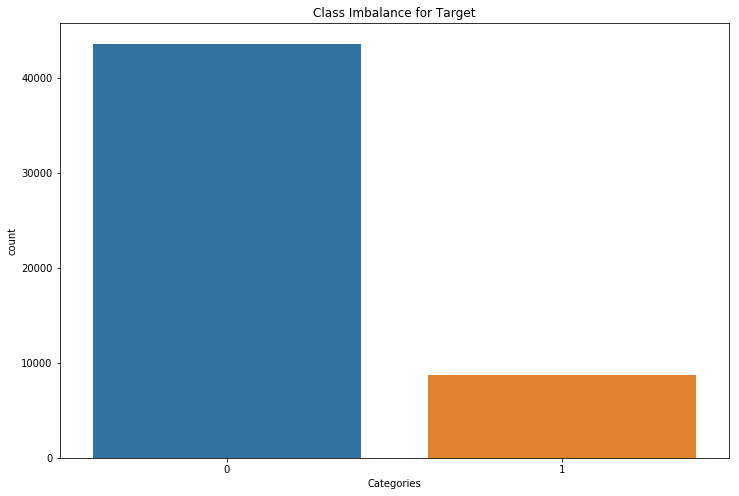

In [29]:
# data['Claim'].value_counts(True).plot(kind = 'bar')
plt.figure(figsize=(12,8))
sns.countplot(data['Claim'])
plt.title('Class Imbalance for Target')
plt.xlabel('Categories')
plt.savefig('class_imbalance.png')


In [22]:
# Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(data)


,Feature,Number of Outliers
0,Duration,5484
1,Net Sales,5335
2,Commision (in value),6394
3,Age,3675
4,Claim,8720


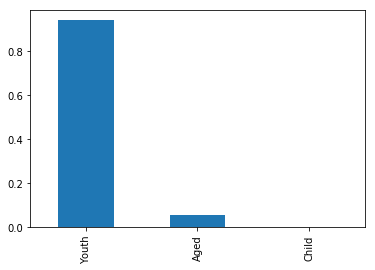

In [75]:
data['Age_type'].value_counts(True).plot(kind = 'bar')

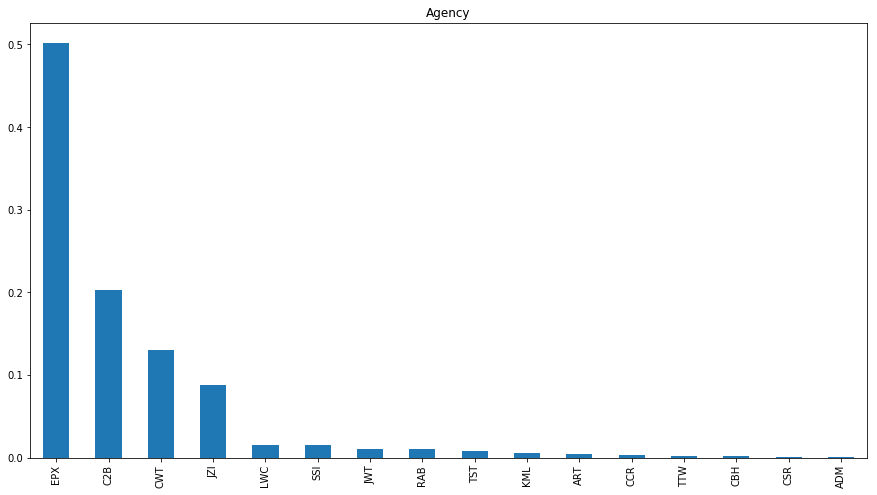

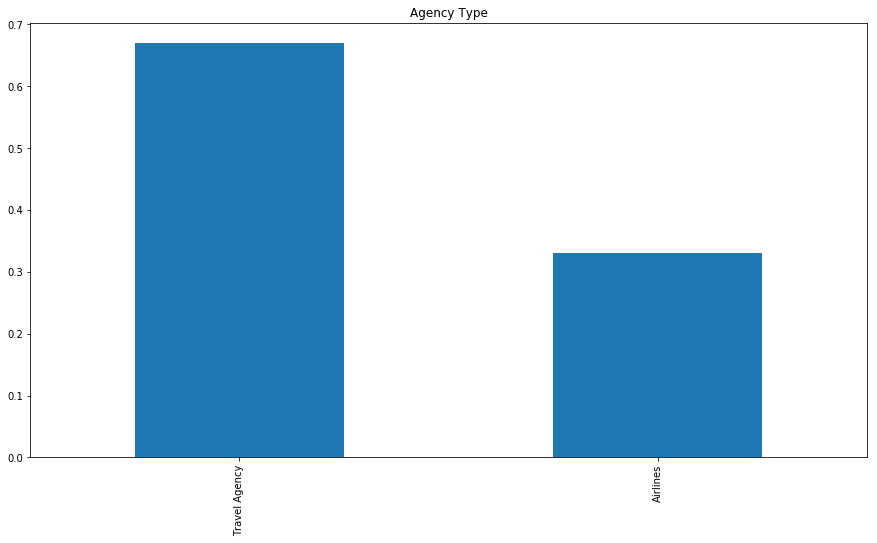

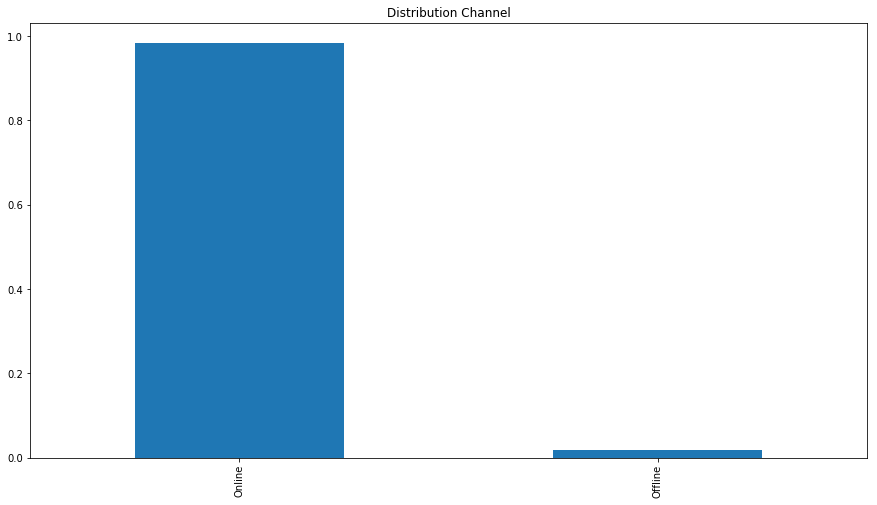

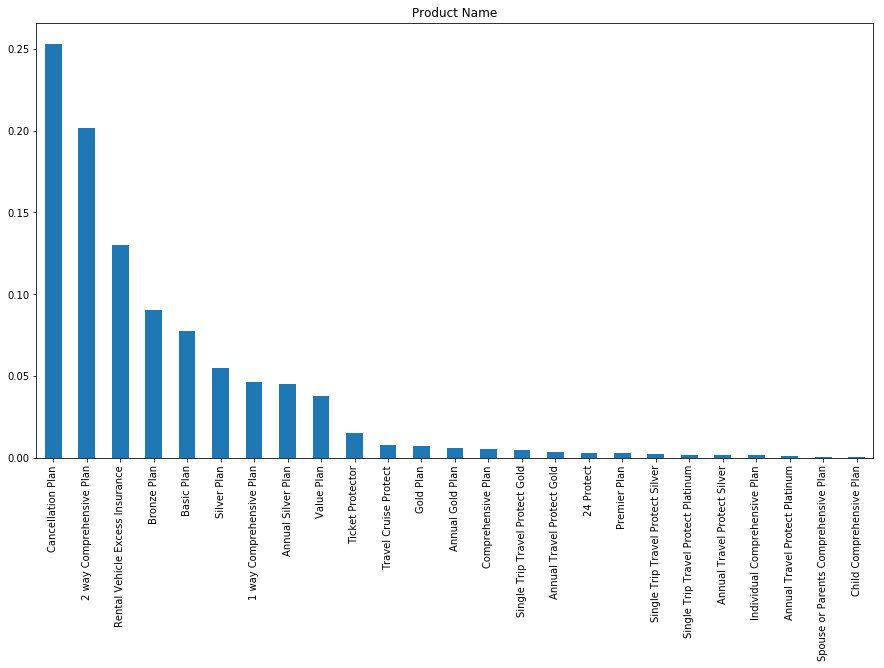

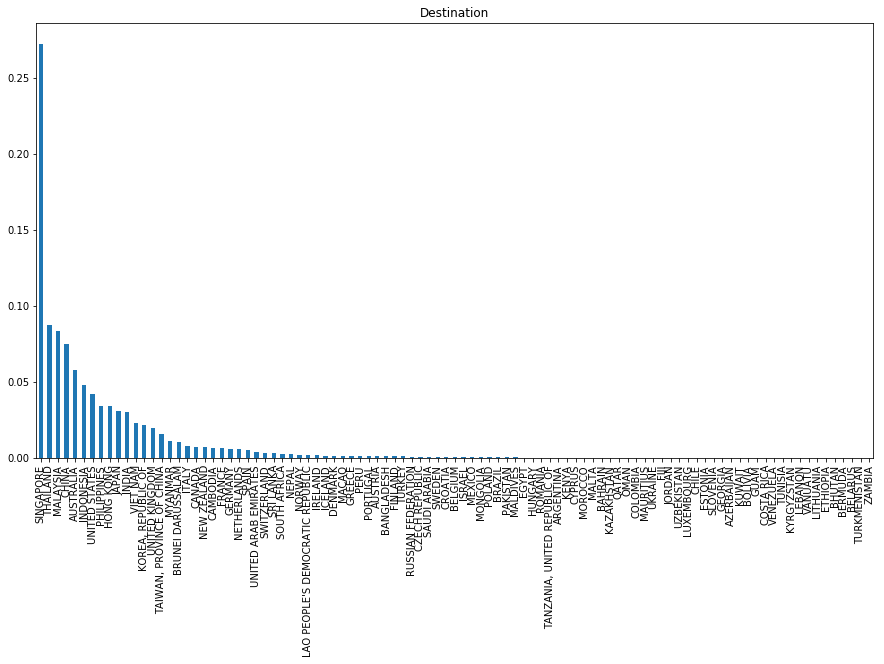

In [32]:
# Function to perform univariate analysis of categorical columns
def plot_categorical_columns(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object']).columns
    
    for i in range(0,len(categorical_columns)):
            plt.figure(figsize=(15,8))
            dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
            plt.title(categorical_columns[i])
            plt.show()
#             plt.savefig('plot_categorical_columns.png')
        
plot = plot_categorical_columns(data)


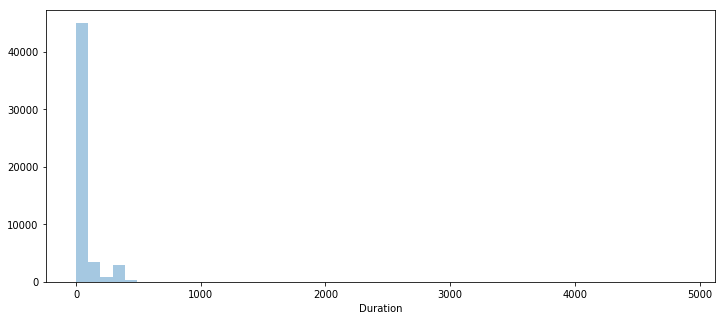

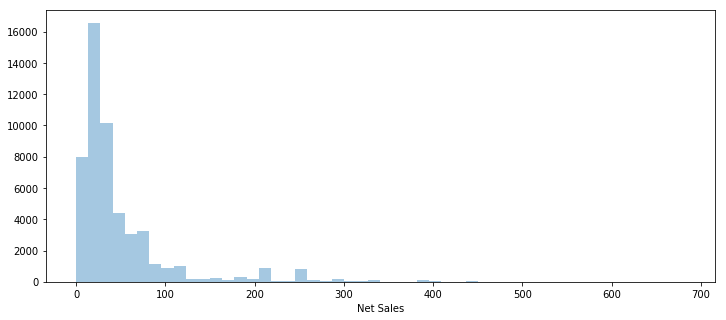

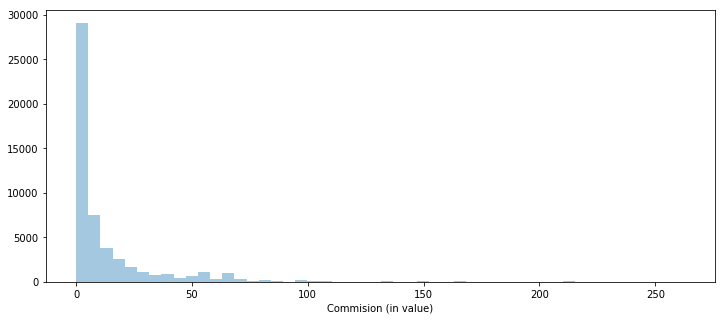

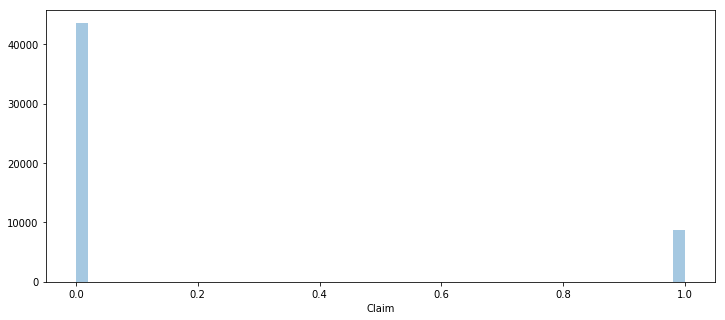

In [85]:

# Function to plot histograms
def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns)):
        plt.figure(figsize=(12,5))
        sns.distplot(dataframe[numeric_columns[i]], kde=False)
        plt.show()


plot_continuous_columns(data)



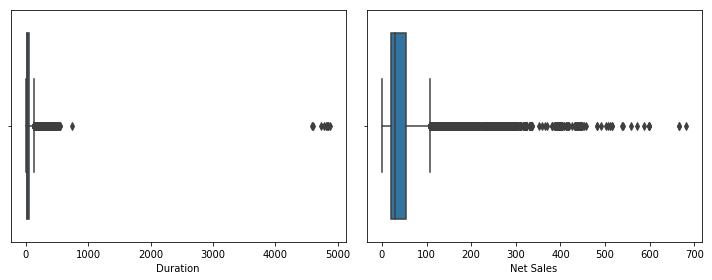

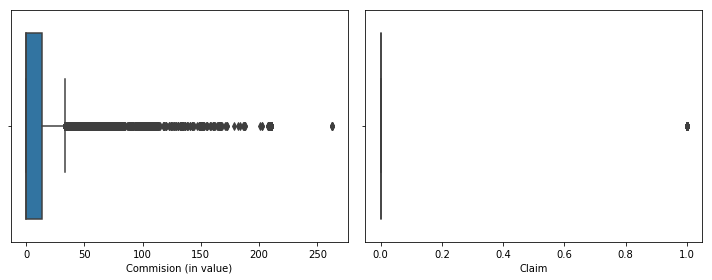

In [90]:
# Function to plot boxplots
def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()   # Numerical featuresb
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])
           
plot_box_plots(data)

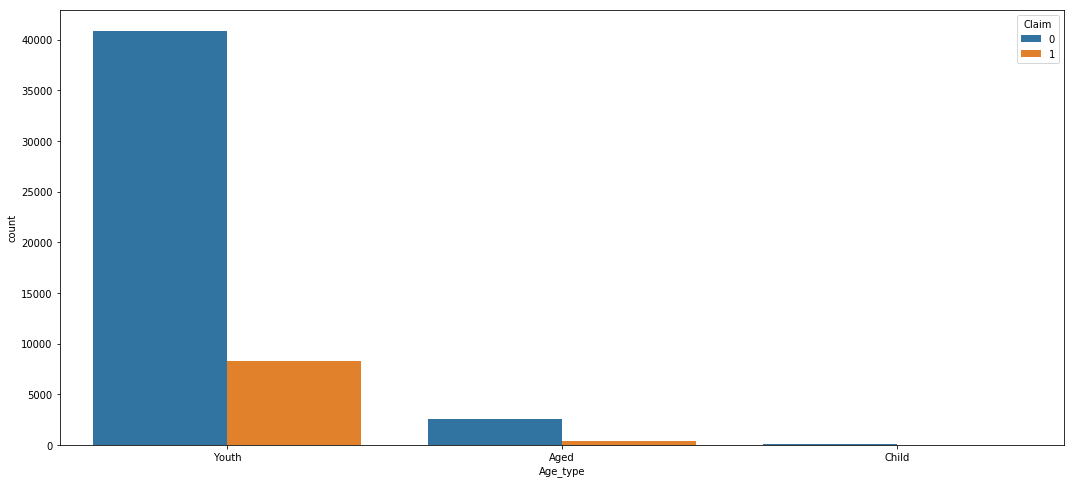

In [94]:
plt.figure(figsize=(18,8))
sns.countplot(x=data['Age_type'],hue=data['Claim'],data=data)

In [109]:
ad = data.groupby(['Age_type','Claim'])
ad.first()

Agency    Agency Type Distribution Channel  \
Age_type Claim                                              
Aged     0        TST  Travel Agency              Offline   
         1        C2B       Airlines               Online   
Child    0        JZI       Airlines               Online   
         1        C2B       Airlines               Online   
Youth    0        EPX  Travel Agency               Online   
         1        EPX  Travel Agency               Online   

                            Product Name  Duration  Destination  Net Sales  \
Age_type Claim                                                               
Aged     0         Travel Cruise Protect        47     THAILAND  30.000000   
         1                   Bronze Plan        17    SINGAPORE  58.211644   
Child    0                    Basic Plan         9    HONG KONG  26.000000   
         1                   Bronze Plan         9    SINGAPORE  20.000000   
Youth    0             Cancellation Plan        61  PHILIPPINES  12.000000   
         1      2 way Comprehensive Plan        13        CHINA  48.662699   

                Commision (in value)  
Age_type Claim                        
Aged     0                 10.500000  
         1                 14.552911  
Child    0                  9.100000  
         1                  5.000000  
Youth    0                  0.000000  
         1                  0.000000

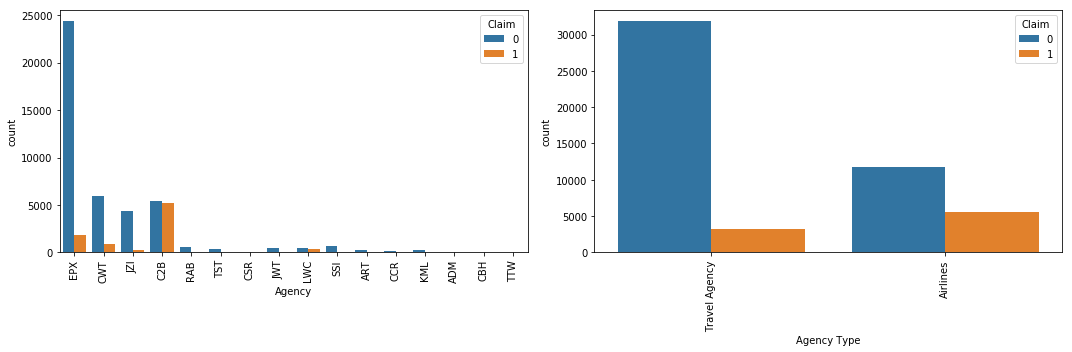

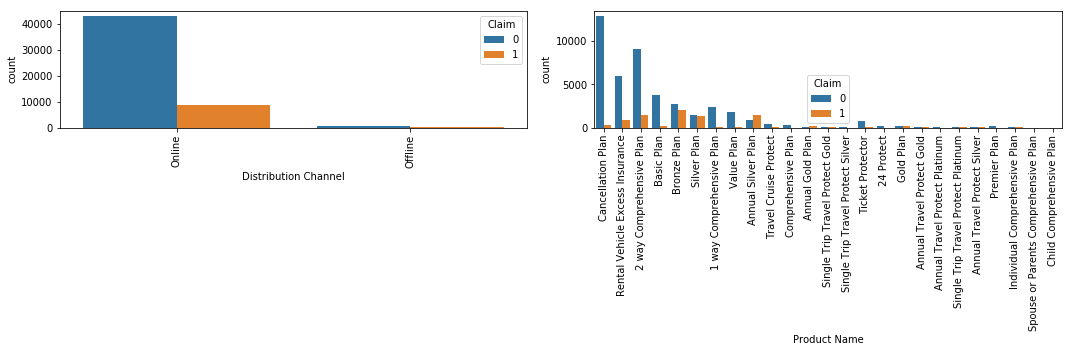

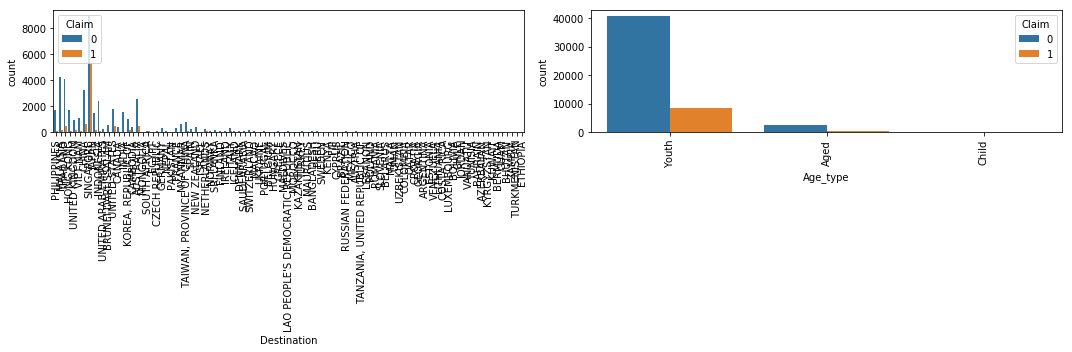

In [91]:
def bivariate_analysis_categorical(dataframe,target):
    categorical_columns = dataframe.select_dtypes(exclude=np.number).columns  # Categorical Features
    for i in range(0,len(categorical_columns),2):
        if len(categorical_columns) > i+1:
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            sns.countplot(x=dataframe[categorical_columns[i]],hue=target,data=dataframe)
            plt.xticks(rotation=90)
            plt.subplot(122)            
            sns.countplot(dataframe[categorical_columns[i+1]],hue=target,data=dataframe)
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()


bivariate_analysis_categorical(data,data['Claim'])

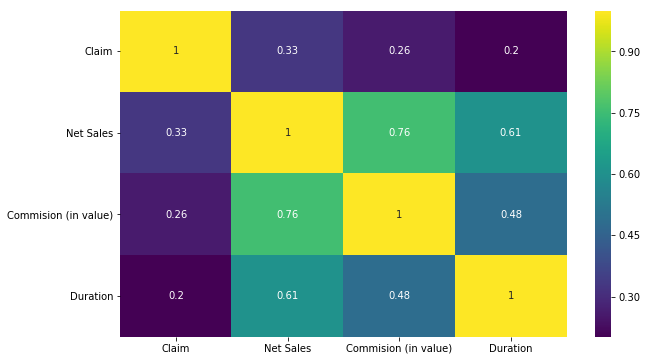

In [129]:
k=4
cols=data.corr().nlargest(k,'Claim')['Claim'].index
cm = data[cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='viridis')
plt.show()

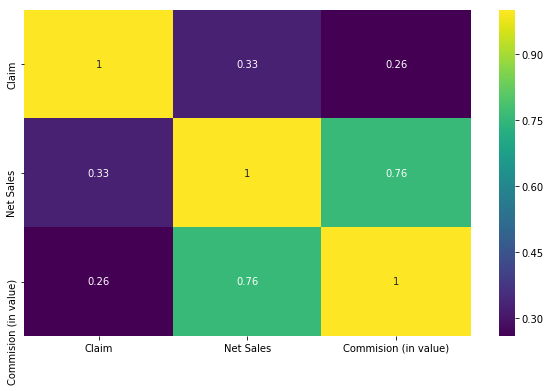

In [131]:
k=3
cols=data.corr().nlargest(k,'Claim')['Claim'].index
cm = data[cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='viridis')
plt.show()

In [133]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age_type,Claim
0,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,Youth,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,Youth,0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,Youth,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,Youth,0
4,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,Youth,0
